<a href="https://colab.research.google.com/github/Max-JI64/Today-I-Learn/blob/main/Study/Image_Processing_Bible/3_1_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%B4%EB%9E%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1.1 인공 신경망 기초
딥러닝은 복잡한 문제 해결과 창의적 사고를 가능하게 함

## 모델 최적화
딥러닝 모델을 훈련시키는 과정  
최적화 과정은 모델의 가중치와 편향 값을 업데이트 -> 특정 손실 함수의 값을 최소화

### 경사 하강법
그레디언트는 손실함수가 가장 바르게 증가하는 가중치가 존재하는 공간에서의 벡터  
손실함수의 그레디언트를 계산, 그레디언트의 반대 방향으로 가중치를 업데이트  
전역 최소 값을 찾기 위해 여러번 반복  

학습률 : 적절한 최적화를 위해 그레디언트에 곱해서 사용하는 비율  
너무 크거나 작은 학습률은 최적화 과정을 방해

- 핵심 개녕 : 모든 학습 데이터를 사용하여 한 번에 그레디언트를 계산하여 모델의 매개변수를 업데이트
- 장점 : 전역 최적점에 수렴할 확률이 높음
- 단점 : 계산 비용이 높고, 데이터가 많으면 시간이 오래 걸림

### SGD 확률적 경사 하강법
- 핵심 개녕 : 한번에 하나의 학습 데이터만을 사용하여 그레디언트를 계산
- 장점 : 계산 비용이 낮고 연산 초기의 빠른 수렴 가능, 지역 최적점에 잘 빠지지 않음
- 단점 : 매개변수 업데이트가 불규칙적

### 미니 배치 경사 하강법
- 핵심 개념 : 배치 사이즈를 지정하여 그 사이즈만큼의 데이터를 사용하여 한번에 그레디언트를 계산
- 장점 : SGD와 경사 하강법의 장점 혼합 -> 계산 효율과 수렴 안정성을 동시에 얻음
- 단점 : 배치 사이즈에 따라 성능이 크게 변할 수 있음

### RMSprop (Root Mean Square Propagation)
미니 배치 경사 하강법의 확장, non-convex 최적화 문제에 뛰어난 성능  
(non-convex : 함수가 볼록하지 않으며, 지역 최적해가 다수 존재)  
- 핵심 개념 : 학습률을 적응적으로 조정하여 학습 과정을 안정화
- 장점 : 안정적이지 않은(비등방성) 함수에서도 효과적으로 최적화
- 단점 : 하이퍼파라미터에 민감  

### Adam (Adaptive Moment Estimation)
- 핵심 개념 : 모멘텀과 RMSprop의 아이디어를 합쳐 그레디언트의 1차 모멘트(평균)와 2차 모멘트(분산)을 추정하여 매개변수를 업데이트
- 장점 : 빠른 수렴 속도와 안정성
- 단점 : 하이퍼파라미터의 조정이 필요, 때로는 불안정한 수렴

## 인공지능 모델의 설계 및 학습


### 데이터 세트의 구조
텐서플로를 사용하여 선형 회귀 더미데이터 생성

In [8]:
# 임의의 독립 변수 X 값 생성
import tensorflow as tf

x = tf.random.uniform(shape=[100], minval=1, maxval=4) #무작위 값 100개
print(x)

tf.Tensor(
[1.1468323 1.2145442 1.1536473 2.528892  3.7892065 2.3882804 3.5815775
 1.4286942 2.3648753 2.495175  2.2732303 2.9742112 2.5641735 3.9325972
 2.426135  2.3352795 1.5423248 2.9444466 1.4735054 1.104299  3.313373
 1.3078185 1.0859694 2.4307947 3.9912133 2.461379  1.2514979 3.923308
 1.5679184 2.026435  3.4898129 2.946156  2.806329  1.4692993 1.6348227
 1.5000349 2.0379543 1.1475025 3.3312023 2.6323051 3.6113186 3.8475652
 3.3283997 1.3766801 2.2225509 1.5276202 1.0867934 3.7807984 3.5803537
 1.0816597 1.9588393 3.1120944 1.2582964 2.6435826 1.8000228 1.8414176
 3.3114612 1.8178027 1.9900008 2.750735  3.055007  2.853342  3.2025604
 3.9423518 1.6707718 2.3576946 1.6518494 3.4124846 3.6988645 3.8007236
 2.748073  2.2060363 3.801852  3.2952156 2.8887377 1.5743729 1.5966595
 1.979071  3.3854387 1.1878201 2.025932  1.2603831 1.0046974 2.8888278
 2.9047318 2.8684232 2.535059  1.0857574 3.3452442 3.787571  3.2087035
 2.8079162 3.3609526 2.4402175 2.0164728 1.4142454 2.2545335 1.23947

In [9]:
# 선형 관계가 있는 종속 변수 Y 값 생성
slope = 1.5
intercept = 3
epsilon = tf.random.truncated_normal(shape=[100], mean=0, stddev=0.3)
y = slope * x + intercept + epsilon
print(y)

tf.Tensor(
[4.4249897 4.481775  4.489111  7.150818  9.236985  6.284493  8.180233
 4.9967394 6.226728  6.993758  6.271836  7.2172413 7.010438  8.590183
 6.9216485 6.1459436 5.1748257 7.0743356 4.6190634 5.1225944 7.6275177
 5.4774675 4.5861225 6.2335396 9.483138  6.8290825 4.975491  8.9937105
 5.4480963 6.609442  8.070408  7.162593  7.0942206 4.9517207 5.296504
 5.036957  5.783324  4.872327  8.028478  6.6714077 8.177446  9.100094
 7.9056606 5.4133124 6.3865767 5.382534  5.2047153 8.635156  8.338259
 4.8300595 5.5991826 7.9303393 5.3317695 6.514985  5.6286077 5.598047
 8.076013  5.511331  5.75857   6.9271145 7.98671   7.2722034 8.117701
 8.639515  5.2778773 6.4698553 5.456936  8.241435  8.284165  8.782882
 6.7929397 6.087621  8.356658  7.3432107 7.207307  5.3222237 5.4003606
 6.006862  8.265401  5.0143814 5.7017775 4.765019  4.014203  7.296437
 7.628994  7.457074  6.600426  4.768605  7.744233  9.018336  7.859489
 6.71627   7.8515267 6.7245274 6.562245  5.3079114 6.484467  5.2391677
 7.02

### Matplotlib을 사용한 데이터 시각화

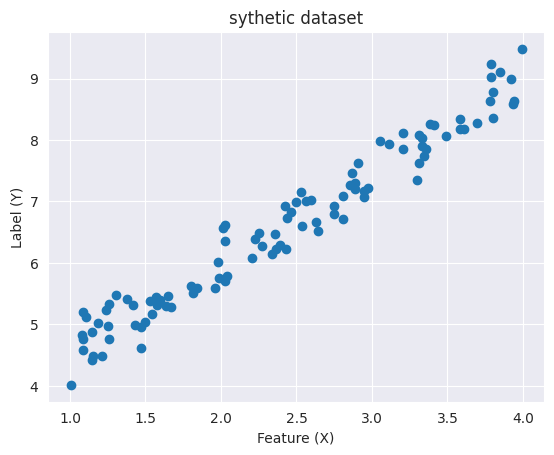

In [10]:
# 맷플로립을 사용한 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.scatter(x, y)
plt.xlabel('Feature (X)')
plt.ylabel('Label (Y)')
plt.title('sythetic dataset')
plt.show()

## 텐서플로를 사용한 선형 데이터 모델링
케라스 API를 이용하여 단일 층 퍼셉트론 모델 구현  

모델 설계 -> 모델 학습 -> 모델 활용

### 모델 설계
선형 회귀의 경우 변수 간의 관계가 선형이기 때문에 단일 입력 뉴런과 단일 출력 뉴런으로 구성된 모델을 구축

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units=1, input_shape=(1,))
])

model.compile(loss='mean_squared_error', optimizer='sgd') #손실함수와 옵티마이저 설정

### 모델 학습

In [12]:
# 데이터의 형태를 (1,)으로 변환
x_train = tf.reshape(x, (-1, 1))
print(x_train.shape)

history = model.fit(x_train, y, epochs=300)

(100, 1)
Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 77.3742
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.9375 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 6.6206 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.2107
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8264 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5411
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4668
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4485
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4629
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4210  
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3533 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4161 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3949 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3953 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4140 
Epo

In [13]:
weights, bias = model.get_weights() #모델의 모든 가중치의 내용을 반환
print("Weights (Slope):", weights)
print("Bias (Intercept):", bias)

Weights (Slope): [[1.5195599]]
Bias (Intercept): [2.8880427]


# 3.1.2 합성곱 신경망 CNN
이미지 데이터는 복잡한 구조를 가지고 있음  
이미지 한 장은 수많은 픽셀로 구성, 3차원 구조  
따라서 공간적인 이미지 데이터의 특성을 파악해야함 - 선형 신경망은 이를 반영하기 너무 단순한 구조  

선형 신경망이 이미지 처리를 진행할 시
1. 공간 정보가 소실 (픽셀간의 거리 정보)  
하나의 픽셀에 대해 멀리 떨어진 픽셀이 가까운 픽셀에 비해 연관성이 낮음에도 모두 동등항 자격으로 연산
2. 연산량이 지나치게 많아짐

## 합성곱 신경망의 구성 요소

### 합성곱 층 convolutional layer
합성곱 필터 : 합성곱 층에 존재하는 사각형 모양의 가중치 필터  
각 합성곱 층은 입력 데이터, 앞 층에서 들어온 데이터에 합성곱 연산을 진행  
각 결과는 입력된 데이터 행렬의 픽셀과 합성곱 필터의 가중치가 곱해진 값  
결과물은 입력값과 마찬가지로 가로, 세로, 채널 세 축 성분을 유지  
- 특징 feature : 입력 값에 가중치를 곱해서 얻은 값
- 특징 벡터, 피쳐 맵 : 합성곱 신경망의 결과물 (3차원 벡터)

### 필터
합성곱 필터는 합성곱 층에서 입력 데이터의 특징을 추출하기 위해 연산되는 가중치들의 집합  
이미지와 동일한 3차원 행렬  
이미지보다 작은 가중치 행렬이 이미지에서 차례대로 이동  
가중치 행렬의 모든 원소와 이에 대응되는 모든 이미지 픽셀들의 값이 곱해진 후 하나의 값으로 합쳐짐 -> 특징 맵을 구성하는 하나의 원소  

이를 통해 원본 이미지의 공간 정보를 유지하여 특징 맵에 전달  
인점한 픽셀 간의 연산만 가능하므로  
모든 픽셀에 대한 연산은 하지 않아  
결과적으로 선형 신경망에 비해 연산 비용과 정확성을 모두 개선

### 커널
합성곱 커널은 이미지의 특정 패턴이나 특징을 감지하기 위해 사용되는 2차원 행렬  
합성곱 필터 내에 포함되어 있으며, 입력된 데이터의 각 채널에 대해 독립적으로 연산을 수행  
커널의 형태는 이미지의 한 채널과 같은 2차원  
필터 내에서 여러 개의 커널이 함께 작동하여 이미지의 다양한 특징을 동시에 감지  

합성곱 필터의 채널 수는 입력 데이터의 채널 수에 의해 결정

### 채널
입력되는 데이터의 채널 수가 크더라도, 출력된 행렬의 채널 깊이는 합성곱 층에서 사용된 필터 수와 동일

### 패딩
입력 데이터의 주변에 특정 값(pad)를 추가하는 과정, 주로 0으로 이루어진 테두리  
합성곱 연산을 거친 후의 출력 사이즈를 조절하기 위함  

패딩이 없다면 출력 사이즈는 입력보다 작아짐 -> 합성곱 층을 여러번 통과하면 중요한 정보가 손실  
가장자리의 정보가 다른 부분에 비해 연산에 덜 참여하게 되기 때문

### 스트라이드
- 슬라이딩 윈도우 기법 : 합성곱 필터가 입력 데이터의 한쪽 끝에서 다른쪽 끝까지 순차적으로 이동하는 움직임
- 스트라이드 : 합성곱 필터가 연산을 한번 수행한 후 움직이는 거리  

스트라이드가 크면 합성곱 층에서 출력되는 데이터의 사이즈가 줄어든다  
- 적은 연산을 통해 정보를 추출할 수 있다
- 일부 픽셀이 연산 범위에 포함되지 않아 중요한 특징이나 패턴을 놓칠 수 있다
- 출력 특징맵의 사이즈가 크게 감소 -> 합성곱 층을 깊게 쌓기 어려워짐

### 출력 크기
- $O$: 출력 피처 맵의 크기 (Output size)
- $W$: 입력 피처 맵의 크기 (Input size)
- $K$: 필터(커널)의 크기 (Filter size)
- $S$: 스트라이드 (Stride, 필터 이동 간격)
- $P$: 패딩 (Padding)  

$$O = \frac{W - K + 2P}{S} + 1$$


### 풀링
딥러닝 신경망은 입력 데이터의 차원과 부피를 늘리거나 줄여가며 학습  
그러나 합성곱 층만 사용하여 입력 데이터의 사이즈를 줄이는 것은 효율적이지 않음  
합성곱 층에 가중치가 내재되어 있기에 모델의 복잡도가 증가하기 때문  

풀링은 특징 맵의 사이즈를 축소함  
매개변수를 사용하지 않고, 제한된 영역에서 대푯값을 추출하여 정보를 압축  
1. 빠른 연산, 전력 사용량 감소
2. 모델의 강건함 <- 이미지 내의 객체가 약간 이동하더라도 풀링을 여러번 거치면 출력 값에 차이가 적음  


## 합성곱 연산 과정

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

input_shape=(224, 224, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', #필터 32개
                 activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding='valid', #필터 64개, 패딩 없음
                 activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


첫번째 합성곱 층  
필터의 채널 수 3, 필터의 사이즈 = (3, 3, 3)  
-> 이미지 픽셀 값과 필터의 가중치 값이 곱해져 27개의 값이 생성   
-> 하나의 값으로 합쳐짐  
패딩 `'same'`적용 -> (224, 224, 32) 특징 맵 생성  

두번째 합성곱 층  
입력 데이터 : 첫번째 합성곱 층의 특징 맵  
입력 데이터의 채널 사이즈 32 -> 합성곱 필터의 사이즈 = (5, 5, 32)  
스트라이드 : 2, 패딩 : 0 -> 특징 맵의 사이즈 = 110 (110.5)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

input_shape=(224, 224, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

`MaxPooling2D`에도 `strides` 인수가 존재  
지정하지 않으면 `pool_size`와 동일한 값으로 설정 (위의 예시에선 2)

`MaxPooling2D`은 영역 내 최댓값을 출력  
평균, 최소, 전역(global) 등의 방법이 있음  

여러 층으로 쌓인 합성곱 층과 풀링 층은 정보를 축약하고 더 넓은 범위의 맥락을 이해하며 이미지 속의 내용을 학습할 수 있다

# 3.1.3 생성적 적대 신경망 GAN

## 이미지 생성
신경망 모델을 통해 이미지를 생성하기 위해선 관념에 관한 일반적인 지식을 주입해야함  
정보에서 자주 등장하는 패턴을 학습하고, 이를 일반화시켜 재구성하여 결과물을 그럴듯하게 만들어냄  

데이터의 분포를 바탕으로 이미지를 구성하기에, 데이터 세트에 자주 등장하여 포착된 객체의 특징은 생성된 이미지에서도 묘사될 확률이 높다  
이미지 학습 과정에서 등장한 몇몇 특징들의 빈도가 모델의 가중치에 확률 분포의 평태로 해석될 수 있고,  
생성 모델은 학습한 정보를 역이용하여 데이터를 재구성

### 이미지 생성 모델에 필요한 요소
1. 사실적이고 정밀한 이미지를 출력  
생성된 이미지 내에서 표현된 객체가 물리적으로 정밀하게 표현되어야 함  
노이즈, 모호한 표현이 없이 시각적으로 명확하게 구분할 수 있어야함
2. 이미지를 사실적으로 묘사  
현실 세계의 객체와 다른 특징을 가지지 말아야 함
3. 생성된 이미지의 품질을 평가하는 능력
이미지의 완성도를 수치적으로 표현하여야 함 -> 손실함수

## 이미지 생성과 비지도 학습
이미지와 같이 레이블링된 데이터를 얻기 힘든 상황에 사용  
데이터의 숨겨진 구조나 패턴을 발견하는데 효과적  

레이블을 전혀 활용할 수 없기에 지도학습만큼 강력한 학습 효율을 낼 수 없다  
따라서 생성적 적대 신경망에서는 레이블 없이 이미지를 학습시키되, 간이 레이블을 만들어 우회적으로 지도학습 수행

## 오토 인코더
1. 이미지의 표현을 파악하고 정보를 작은 사이즈로 압축 (인코딩)
2. 압축된 정보를 원본 이미지의 사이즈와 비슷하게 재구성 (디코딩)  
3. 생성된 이미지가 원본 이미지와 차이나지 않도록 모델을 학습  

비지도 학습이지만, 입력 이미지가 동시에 레이블로 사용됨  

단점  
1. 이미지를 입력받아야만 이미지 생성 가능  
-> 이미지 생성 자유도를 크게 제한
2. 구조가 단순하여 표현에 제한이 생김  
입력받은 이미지들의 특징만을 재현할 수 있음  

### 인코더
여러 층의 신경망으로 구성  
고차원의 복잡한 이미지 데이터의 차원을 축소하고 잠재 공간으로 표현  
이 과정에서 이미지를 표현할 수 있는 가장 중요하고 의미있는 정보를 탐색  
비선형 특성까지 고려할 수 있어 차원 축소에 유용함

### 디코더
인코더에 의해 생성된 잠재 공간 표현을 원래의 데이터 공간으로 복원  
원본 이미지와 같은 사이즈로 유사한 이미지를 생성  
심층 신경망을 통해 형성되며 인코더의 구조를 반대로 따름

## 생성적 적대 신경망의 아이디어
1. 생성자 Generator : 실제 데이터와 유사한 데이터를 생성
2. 판별자 Discriminator : 생성된 데이터가 원본인지 판별

### 생성자
판변자를 속여 가짜 데이터를 실제 데이터로 분류하게 함  
이 과정으로 생성자는 점차적으로 실제 데이터의 분포를 학습  

생성자는 랜덤 노이즈, 잠재 공간에서 샘플링된 벡터를 입력으로 받음  
해당 벡터는 생성자 신경망을 통과하며 다양한 층과 활성화 함수를 지남  
최종적으로 실제 데이터와 동일한 차원과 형태를 가진 데이터를 출력

### 판별자
이진 분류 문제를 해결하는 모델 -> 이진교차 엔트로피 손실함수

1. 생성자로 가짜 샘플을 생성
2. 진짜와 가짜 샘플을 각각 입력받아 판별자가 출력하는 확률 값을 계산
3. 진짜와 가짜 샘플에 대한 손실을 합하여 총 손실을 계산
4. 총 손실에 대한 그레디언트를 계산, 생성자와 판별자의 가중치를 업데이터

## 텐서플로를 활용한 생성적 적대 신경망의 학습 실습

### MNIST 데이터

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from google.colab.patches import cv2_imshow

(train_images, _), (_, _) = mnist.load_data()
train_images = (train_images - 127.5) / 127.5 #픽셀값의 범위를 [-1, 1]로 조정

cv2_imshow(train_images[0]*127.5+127.5)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### 모델 생성

In [17]:
#생성자
def build_generator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dense(28*28, activation='tanh'))
    model.add(Reshape((28, 28)))
    return model

#판별자
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

#사용할 파라미터
INPUT_DIM = 50 #랜덤 노이즈의 차원 수
BATCH_SIZE = 64
EPOCHS = 10
BUFFER_SIZE = 600 #데이터 세트를 섞어줄 단위

#모델 선언
generator = build_generator(INPUT_DIM)
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-2)

#데이터를 학습에 용이하도록 변형
train_dataset = tf.data.Dataset.from_tensor_slices(train_images)\
                  .shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 손실 함수 정의
- 판별자 : 원본과 생성본을 잘 구분하는지
- 생성자 : 판별자를 많이 속였는지

In [18]:
#이진 교차 엔트로피
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy()

#판별자의 손실함수
def discriminator_loss(real_output, fake_output):
    #real_output : 원본 이미지를 보고 나온 판별자의 결과 값, 1이 정답
    #fake_output : 생성자의 생성 이미지를 보고 판별자가 판단한 결과 값, 0이 정답
    real_loss = binary_cross_entropy(tf.ones_like(real_output), real_output) #원본 이미지 손실
    fake_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output) #생성자 이미지 손실
    total_loss = real_loss + fake_loss
    return total_loss

#생성자의 손실함수
#fake_output이 1과 얼마나 가까운지로 손실 판별
def generator_loss(fake_output):
    return binary_cross_entropy(tf.ones_like(fake_output), fake_output)


@tf.function #해당 데코레이터는 텐서플로의 그래프 컴파일 기능을 사용하여 함수 최적화, 연산 속도 증대
def train_step(images): #단 한번의 가중치 업데이트를 위한 함수
    noise = tf.random.normal([BATCH_SIZE, INPUT_DIM])

    #tf.GradientTape() : 연산을 기록
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True) #이미지 생성

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output) #생성자 손실 생성
      disc_loss = discriminator_loss(real_output, fake_output) #판별자 손실 생성

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) #생성자 그레디언트 계산
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables) #판별자 그레디언트 계산

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) #생성자의 가중치 업데이트
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables)) #판별자의 가중치 업데이트
    return gen_loss, disc_loss, generated_images


### 모델 학습

In [19]:
for epoch in range(1,EPOCHS+1):
    t = tqdm(train_dataset)
    for image_batch in t:
        g_loss, d_loss, fake_image = train_step(image_batch)
        t.set_description_str(f"Epoch - {epoch}")
        t.set_postfix({"G_loss":"%0.3f" %g_loss.numpy(),
                       "D_loss":"%0.3f" %d_loss.numpy()})
    cv2_imshow(np.concatenate(
        list(fake_image.numpy()[:10]*127.5+127.5),axis=1))

Epoch - 1: 100%|██████████| 938/938 [00:12<00:00, 76.34it/s, G_loss=14.603, D_loss=0.215] 


Epoch - 2: 100%|██████████| 938/938 [00:05<00:00, 170.61it/s, G_loss=4.041, D_loss=3.302]


Epoch - 3: 100%|██████████| 938/938 [00:06<00:00, 152.01it/s, G_loss=2.062, D_loss=1.100]


Epoch - 4: 100%|██████████| 938/938 [00:05<00:00, 158.20it/s, G_loss=1.492, D_loss=0.444]


Epoch - 5: 100%|██████████| 938/938 [00:06<00:00, 148.46it/s, G_loss=4.328, D_loss=0.564]


Epoch - 6: 100%|██████████| 938/938 [00:10<00:00, 91.73it/s, G_loss=5.794, D_loss=1.928] 


Epoch - 7: 100%|██████████| 938/938 [00:10<00:00, 91.72it/s, G_loss=4.611, D_loss=0.244]


Epoch - 8: 100%|██████████| 938/938 [00:06<00:00, 140.60it/s, G_loss=3.946, D_loss=0.490]


Epoch - 9: 100%|██████████| 938/938 [00:06<00:00, 143.92it/s, G_loss=6.177, D_loss=1.315]


Epoch - 10: 100%|██████████| 938/938 [00:10<00:00, 91.75it/s, G_loss=1.772, D_loss=2.139] 


- G_loss : 생성자의 손실 값  
- D_loss : 판별자의 손실 값

## 생성적 적대 신경망의 한계
1. 노이즈로부터 만들어지는 이미지  
노이즈로 만들어진 이미지는 어느정도 실제 이미지와 유사하고, 생성 결과가 제한적이지 않으며 다양함  
일관성 없는 결과나 예측할 수 없는 변동이 발생할 수 있음 -> 구체적으로 원하는 이미지는 만들기 어렵다
2. 객체 인식 불가능  
이미지 내 개체의 세부적인 특성이나 위치 등을 인식하거나 조절하는데 한계
3. 학습의 불안정성  
생성자와 판별자가 서로 경쟁 -> 학습 과정이 상당히 불안정적  
판별자가 빨리 학습됨 -> 생성자는 그레디언트를 얻지 못해 학습 진행 못함